## Matrizes - Parte 2

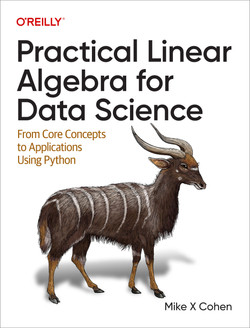

### Bibliotecas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Normas Matriciais

Existem multiplas normas distintas que podem ser calculadas de uma matriz. Normas matriciais são de alguma forma similares a normas vetoriais em que cada norma fornece um número qeu caracteriza a matriz.

A norma é indicada usando duas linhas verticais, por exemplo, a norma da matriz A é indicada por $\|\bold{A}\|$.

In [ ]:
# Exemplo de norma vetorial
vetor = np.array([3, 4])
norma_vetorial = np.linalg.norm(vetor)
print(f"Norma vetorial: {norma_vetorial}")

# Exemplo de norma matricial
matriz = np.array([[1, 2], [3, 4]])
norma_matricial = np.linalg.norm(matriz, ord='fro')  # Norma de Frobenius
print(f"Norma matricial (Frobenius): {norma_matricial}")

Norma vetorial: 5.0
Norma matricial (Frobenius): 5.477225575051661


As normas matriciais podem ser amplamente divididas em duas famílias: **normas elementares** (ou de entrada) e **normas induzidas**.

As **normas elementares** são calculadas com base nos elementos individuais da matriz. Por isso, essas normas podem ser interpretadas como uma medida das magnitudes dos elementos da matriz.

Por outro lado, as **normas induzidas** podem ser entendidas da seguinte forma: uma das funções de uma matriz é representar a transformação de um vetor. A norma induzida de uma matriz mede o quanto essa transformação escala (alongando ou contraindo) o vetor.

Este capítulo abordará as normas elementares. A **norma Euclidiana**, também chamada de **norma de Frobenius**, é uma extensão direta da norma vetorial. Ela é calculada como a raiz quadrada da soma de todos os elementos da matriz elevados ao quadrado:
$$
\|\bold{A}\|_F = \sqrt{ \sum^M_{i=1} \sum^N_{j=1} a^2_{i,j} }
$$

Os índices $i$ e $j$ correspondem às $M$ linhas e $N$ colunas da matriz. A anotação subscrita $_F$ indica a norma de Frobenius.

Essa norma também é chamada de **norma** $\ell_2$, pois é um caso especial da fórmula geral para normas-$p$ elementares:

$$
\|\bold{A}\|_p = (\sum^M_{i=1} \sum^N_{j=1} |a_{i,j}|^p)^{\frac{1}{p}}
$$
*Perceba que você obtém a norma de Frobenius quando $p=2$*

---

Uma das aplicações mais importantes das normas matriciais na análise estatística e no machine learning é sua utilização na regularização, cujo objetivo é melhorar o ajuste do modelo e aumentar sua capacidade de generalização para novos dados. A ideia básica da regularização é adicionar uma norma matricial como uma função de custo a um algoritmo de minimização. Essa norma ajuda a:

- **Evitar que os parâmetros do modelo se tornem muito grandes** (a regularização $\ell_2$, também conhecida como regressão Ridge).
- **Incentivar soluções esparsas** (a regularização $\ell_1$, também conhecida como regressão Lasso).

As arquiteturas modernas de **deep learning** dependem amplamente das normas matriciais para alcançar altos desempenhos na resolução de problemas, como os de visão computacional.

Outra aplicação da norma de Frobenius é medir a **distância entre matrizes**. A distância matricial de uma matriz consigo mesma é 0, e a distância entre duas matrizes distintas aumenta à medida que os valores numéricos dessas matrizes se tornam mais diferentes.

Essa métrica pode ser usada como critério de otimização em **machine learning**, por exemplo, para reduzir o tamanho de armazenamento de dados de uma imagem enquanto minimiza a distância de Frobenius entre a matriz reduzida e a matriz original.

In [10]:
# Definindo duas matrizes
matriz1 = np.array([[1, 2], [3, 4]])
matriz2 = np.array([[2, 3], [4, 5]])

# Calculando a distância de Frobenius
distancia = np.linalg.norm(matriz1 - matriz2, ord='fro')
print(f"Distância de Frobenius entre as matrizes: {distancia}")

Distância de Frobenius entre as matrizes: 2.0


### Traço de Matriz e Norma de Frobenius

O **traço** de uma matriz é a soma de seus elementos diagonais, indicado por $tr(\bold{A})$, e só existe para matrizes quadradas. Por exemplo, as duas matrizes a seguir possuem o mesmo traço (14):

$$
\begin{bmatrix}
4 & 5 & 6 \\
0 & 1 & 4 \\
9 & 9 & 9 \\
\end{bmatrix},

\begin{bmatrix}
0 & 0 & 0 \\
0 & 8 & 0 \\
1 & 2 & 6 \\
\end{bmatrix}
$$

O traço possui algumas propriedades interessantes. Por exemplo:

- O traço de uma matriz é igual à soma de seus autovalores, sendo, portanto, uma medida do volume de seu autoespaço.
- Ele é invariante sob transformações de similaridade, ou seja, $tr(\bold{A}) = tr(\bold{P}^{-1}\bold{A}\bold{P})$ para qualquer matriz invertível $\bold{P}$.

Outra propriedade importante relaciona o traço com a norma de Frobenius:

$$
\|\bold{A}\|_F = \sqrt{ \sum^M_{i=1} \sum^N_{j=1} a^2_{i,j} } = \sqrt{tr(A^TA)}
$$

A norma de Frobenius pode ser calculada como a raiz quadrada do traço do produto da matriz transposta por ela mesma. Isso ocorre porque cada elemento diagonal da matriz $\bold{A}^T\bold{A}$ é definido pelo produto escalar de cada linha da matriz $\bold{A}$ com ela mesma.

In [7]:
# Exemplo de cálculo do traço
matriz = np.array([[4, 5, 6], [0, 1, 4], [9, 9, 9]])
traco = np.trace(matriz)
print(f"Traço da matriz: {traco}")

Traço da matriz: 14


### Espaços Matriciais (colunas, linhas e nulos)

Os **espaços matriciais** são conceitos fundamentais em álgebra linear e podem ser entendidos como combinações lineares ponderadas das características de uma matriz. Esses espaços incluem:

- **Espaço das colunas**: O conjunto de todas as combinações lineares das colunas de uma matriz. Ele representa o subespaço gerado pelos vetores coluna.

- **Espaço das linhas**: O conjunto de todas as combinações lineares das linhas de uma matriz. Ele representa o subespaço gerado pelos vetores linha.

- **Espaço nulo (ou núcleo)**: O conjunto de todos os vetores que, quando multiplicados pela matriz, resultam no vetor nulo. Ele descreve as soluções do sistema homogêneo $A\mathbf{x} = 0$.

Esses espaços são úteis para entender propriedades como a dimensão, o posto e a nulidade de uma matriz, além de serem amplamente aplicados em problemas de otimização, análise de dados e aprendizado de máquina.

#### Espaço colunar

Primeiro, conceitualizamos uma matriz como um conjunto de vetores coluna. Em seguida, consideramos um conjunto infinito de valores reais escalares, em vez de trabalhar com um conjunto específico de escalares. Isso resulta em infinitas formas de combinar os vetores de um conjunto. O conjunto resultante é chamado de espaço colunar de uma matriz.

$$ C\left( \begin{bmatrix} 1 \\ 3 \end{bmatrix} \right) = \lambda \begin{bmatrix} 1 \\ 3 \end{bmatrix}, \quad \lambda \in \mathbb{R} $$

O $C(\bold{A})$ indica o espaço colunar da matriz $\bold{A}$.

Por exemplo, o vetor $\begin{bmatrix} -2 \\ -6 \end{bmatrix}$ está no espaço colunar, pois pode ser expresso com $\lambda = -2$. No entanto, o vetor $\begin{bmatrix} 1 \\ 4 \end{bmatrix}$ não pertence ao espaço colunar da matriz, pois não existe um escalar que, ao multiplicar a matriz, produza esse vetor.

Para uma matriz com uma única coluna, o espaço colunar é uma linha que passa pela origem na direção do vetor no espaço vetorial e se estende ao infinito em ambas as direções.

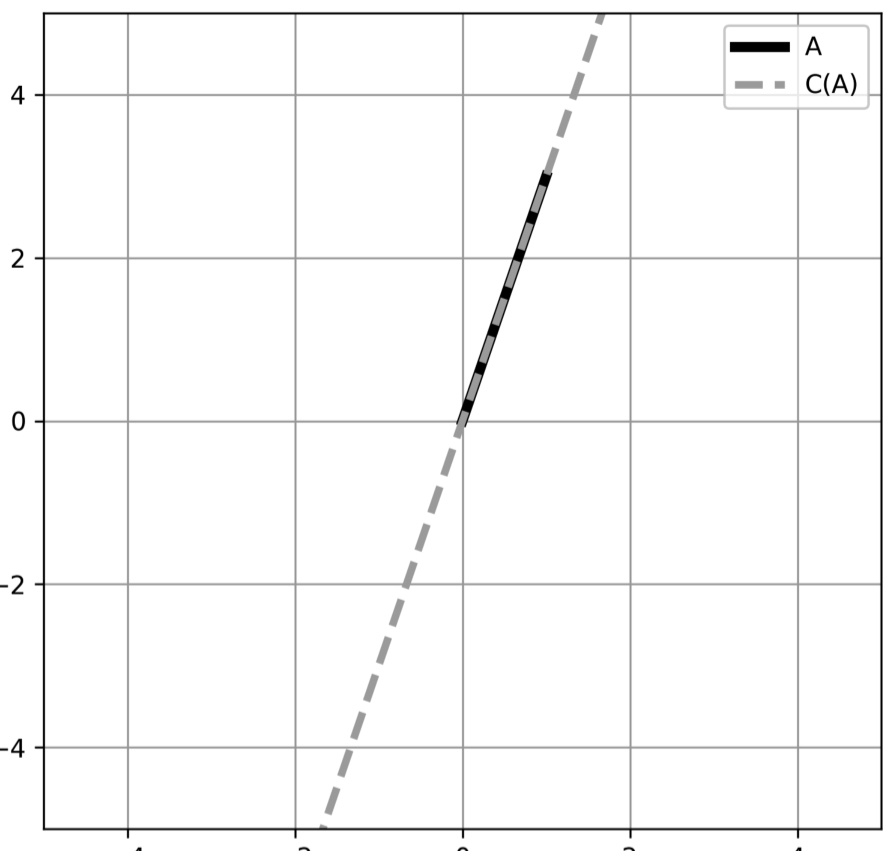

In [9]:
# Definindo uma matriz
matriz = np.array([[1, 2], [3, 6]])

# Verificando se um vetor pertence ao espaço colunar
vetor = np.array([4, 12])
combinacao = np.linalg.lstsq(matriz, vetor, rcond=None)[0]
print(f"Combinação linear para gerar o vetor: {combinacao}")

Combinação linear para gerar o vetor: [0.8 1.6]


---

Considerando uma matriz com mais colunas:

$$ C\left( \begin{bmatrix} 1 & 1 \\ 3 & 2 \end{bmatrix} \right) = \lambda_1 \begin{bmatrix} 1 \\ 3 \end{bmatrix}

\lambda_2 \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad \lambda_1, \lambda_2 \in \mathbb{R} $$

Com duas colunas, temos dois $\lambda$ diferentes. O conjunto de todos os vetores que podem ser alcançados por alguma combinação linear desses dois vetores coluna é o espaço $\mathbb{R}^2$.

Por exemplo, o vetor $\begin{bmatrix} -4 \\ 3 \end{bmatrix}$ pode ser obtido escalonando as duas colunas por 11 e -15, respectivamente (esses escalares foram obtidos pelo método de projeção dos mínimos quadrados).

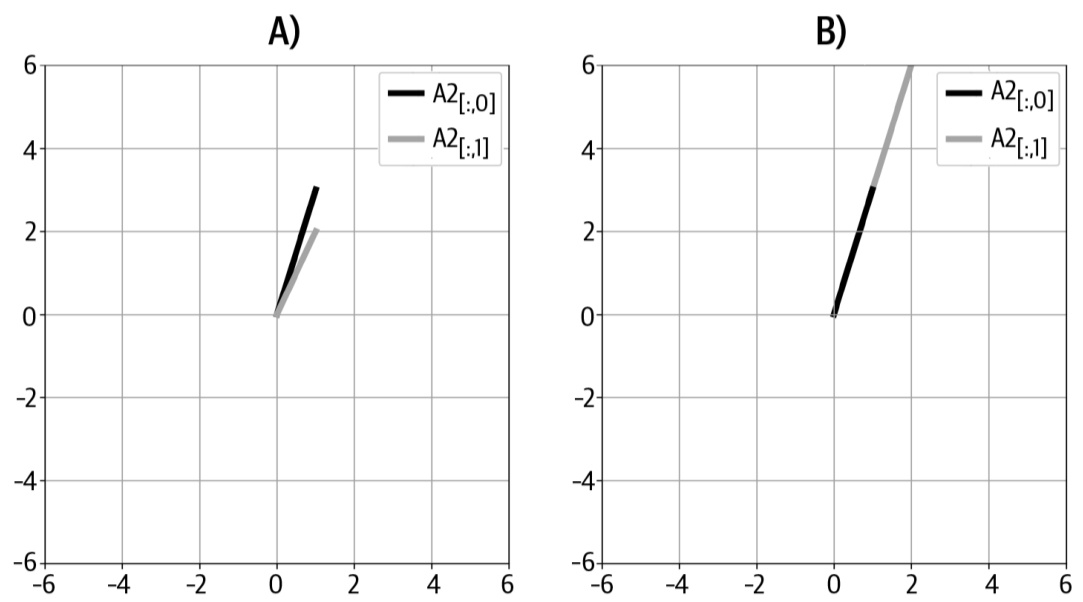

---

Outro exemplo é:

$$ C\left( \begin{bmatrix} 1 & 2 \\ 3 & 6 \end{bmatrix} \right) = \lambda_1 \begin{bmatrix} 1 \\ 3 \end{bmatrix} +

\lambda_2 \begin{bmatrix} 2 \\ 6 \end{bmatrix}, \quad \lambda_1, \lambda_2 \in \mathbb{R} $$

Essas duas colunas são colineares, pois uma é uma versão escalada da outra. Isso significa que o espaço colunar dessa matriz $2 \times 2$ é apenas uma linha — um subespaço 1D.

A dimensionalidade do espaço colunar é igual ao número de colunas **apenas se as colunas forem linearmente independentes**.

---

Um ultimo exemplo:

$$ 
C\left(
\begin{bmatrix}
3 & 0 \\
5 & 2 \\
1 & 2 
\end{bmatrix} \right) = 
\lambda_1 \begin{bmatrix}
3 \\
5 \\
1 
\end{bmatrix} +
\lambda_2 \begin{bmatrix}
0 \\ 
2 \\
2
\end{bmatrix}, \quad 
\lambda_1, \lambda_2 \in \mathbb{R}
$$

Agora há 2 colunas em $\mathbb{R}^3$. Essas colunas são **linearmente independentes**, o que significa que o espaço colunar dessa matriz está em 2D. No entanto, esse plano 2D está embutido em $\mathbb{R}^3$.

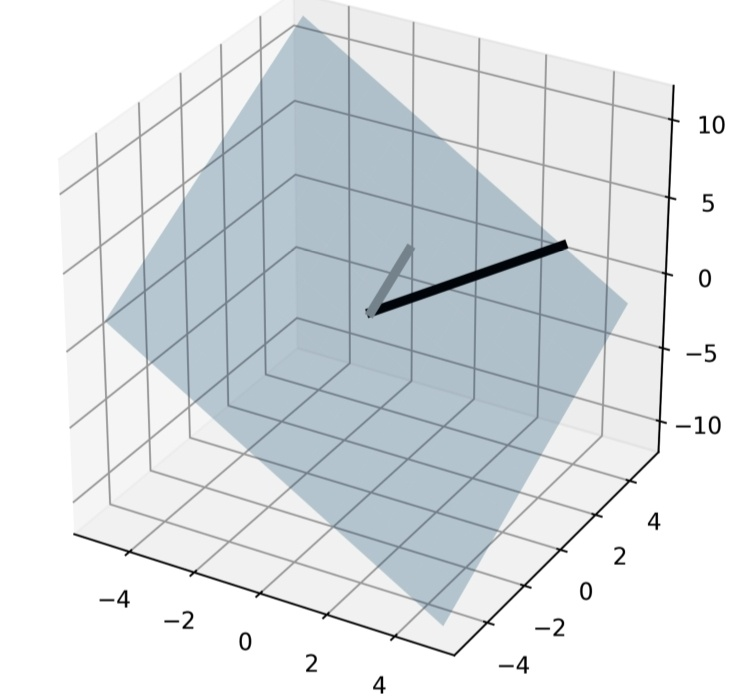

Há muitos vetores no plano, mas há muito mais vetores fora dele.

#### Espaço linear

O espaço linear de uma matriz segue o mesmo conceito do espaço colunar, mas, em vez de considerar as combinações lineares das colunas, analisamos as combinações lineares das linhas da matriz.

$$
R(A) = C(A)^T
$$
O espaço linear é invariante sob operações de redução de linha. Isso significa que, ao realizar operações elementares nas linhas da matriz, o espaço linear permanece o mesmo.

Para matrizes simétricas, os espaços linear e colunar são idênticos, ou seja:
$$ R(A) = C(A)^T $$

#### Espaços nulos

O espaço nulo de uma matriz, também chamado de núcleo, é o conjunto de todos os vetores que, ao serem multiplicados pela matriz, resultam no vetor nulo. Ele pode ser representado pela equação:

$$ A\mathbf{y} = 0 $$

Isso significa que o espaço nulo contém todos os vetores $\mathbf{y}$ que satisfazem essa equação. Em contraste, o espaço colunar está relacionado à equação:

$$ A\mathbf{x} = \mathbf{b} $$

Uma pergunta importante ao analisar o espaço nulo é: "Podemos encontrar um conjunto de pesos que não sejam todos zero e que produzam o vetor nulo?"

Se tal conjunto de pesos existir, ele estará no espaço nulo da matriz $\bold{A}$, que é denotado por $N(A)$.

Há uma relação direta entre a dimensionalidade do espaço nulo e a independência linear das colunas de uma matriz:

- O espaço nulo é **vazio** (contém apenas o vetor nulo) quando as colunas da matriz são **linearmente independentes**.

- Caso contrário, o espaço nulo terá dimensão maior que zero, indicando que existem combinações lineares não triviais das colunas que resultam no vetor nulo.


In [8]:
A = np.array([[1, -1], [-2, 2]])
B = np.array([[1, -1], [-2, 3]])

print("Espaço nulo da matriz A:")
print(scipy.linalg.null_space(A))

print("\nEspaço nulo da matriz B:")
print(scipy.linalg.null_space(B))

Espaço nulo da matriz A:
[[0.70710678]
 [0.70710678]]

Espaço nulo da matriz B:
[]


Dado o número infinito de vetores possíveis no espaço nulo, o Python retorna um vetor unitário como representante. Vetores unitários são convenientes para trabalhar, pois possuem propriedades úteis, como:

- **Estabilidade numérica**: Operações com vetores unitários tendem a ser mais estáveis em cálculos computacionais.

- **Normalização**: O vetor unitário tem norma igual a 1, o que facilita comparações e análises.